#### What was written about the data.

Context The Internet (or internet) is a global system of interconnected computer networks that uses the Internet protocol suite (TCP/IP) to communicate between networks and devices. It is a network of networks that consists of private, public, academic, business, and government networks of local to global scope, linked by a broad array of electronic, wireless, and optical networking technologies. The Internet carries a vast range of information resources and services, such as the interlinked hypertext documents and applications of the World Wide Web (WWW), electronic mail, telephony, and file sharing.

Content The following dataset has information about internet users from 1980-2020. Details about the columns are as follows:

Entity - Contains the name of the countries and the regions. Code - Information about country code and where code has the value 'Region', it denotes division by grouping various countries. Year - Year from 1980-2020 Cellular Subscription - Mobile phone subscriptions per 100 people. This number can get over 100 when the average person has more than one subscription to a mobile service. Internet Users(%) - The share of the population that is accessing the internet for all countries of the world. No. of Internet Users - Number of people using the Internet in every country. Broadband Subscription - The number of fixed broadband subscriptions per 100 people. This refers to fixed subscriptions to high-speed access to the public Internet (a TCP/IP connection), at downstream speeds equal to, or greater than, 256 kbit/s.

The data was gathered from Kaggle

#### My observations
- 8867 rows, 8 columns
- Afghanistan to Zimbabwe
- Need to think about what zeros in each column mean

In [ ]:
#This is a change

### Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np

# Regex
import re

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.metrics import roc_auc_score


from itertools import product
import random

import os

### Import a csv file into Pandas DataFrame

In [2]:
#Import the first dataset. It considers internet usage by country, by year
global_users = pd.read_csv('Global_Internet_Users.csv')

In [3]:
global_users.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [4]:
global_users.tail()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
8862,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
8863,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
8864,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
8865,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818
8866,8866,Zimbabwe,ZWE,2020,88.755806,29.299999,4591211,1.368916


In [5]:
#Remove the first column of the dataframe as it is only counting the row number

global_users = global_users.iloc[:,1:]

### API

In [6]:
import requests
import json

print("Starting program...")

# Define the API endpoint URL
url = "https://api.worldbank.org/v2/en/indicator/IT.NET.USER.P2"

# Define the parameters for the API request (optional)
params = {
    "format": "json",
    "per_page": 100,
    "source": "2"
}

# Make the API request and retrieve the data
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = json.loads(response.content)
    # Extract the relevant information
    for item in data[1]:
        country = item["country"]["value"]
        value = item["value"]
        year = item["date"]
        print(f"{country}: {value} ({year})")
else:
    print("Error: Failed to retrieve data from API.")

Starting program...


In [21]:
import requests
import time

kaggle = requests.get('https://www.kaggle.com/')
kaggle

<Response [200]>

### Web Scraping

### Regex

In [204]:
# Look at the types of each column
global_users.dtypes

Entity                     object
Code                       object
Year                        int64
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object

In [205]:
# The 'Year' column is type int64. Therefore, to use a regex, it need to be converted to a string type

global_users['Year'] = global_users['Year'].astype(str)

# Check the types of columns now

global_users.dtypes

Entity                     object
Code                       object
Year                       object
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object

In [206]:
reg = r"199\d{1}"

matching_pattern = global_users['Year'].str.contains(reg)

matching_df = global_users[matching_pattern]
print(matching_df.head())
print(matching_df.tail())

         Entity Code  Year  Cellular Subscription  Internet Users(%)  \
10  Afghanistan  AFG  1990                    0.0                0.0   
11  Afghanistan  AFG  1991                    0.0                0.0   
12  Afghanistan  AFG  1992                    0.0                0.0   
13  Afghanistan  AFG  1993                    0.0                0.0   
14  Afghanistan  AFG  1994                    0.0                0.0   

    No. of Internet Users  Broadband Subscription  
10                      0                     0.0  
11                      0                     0.0  
12                      0                     0.0  
13                      0                     0.0  
14                      0                     0.0  
        Entity Code  Year  Cellular Subscription  Internet Users(%)  \
8841  Zimbabwe  ZWE  1995               0.000000           0.007684   
8842  Zimbabwe  ZWE  1996               0.000000           0.016790   
8843  Zimbabwe  ZWE  1997               0.

### Replace missing values

We would prefer to replace missing values in this dataset than drop duplicates since duplicates ares there for a reason, for instance, in the 'Year' column they are there because each country has every year from 1980 to 2020 or in the 'Entity' column each country is repeated becuase it has 21 entries. 

In [207]:
# Count how many missing values there are in the 'Year' column
global_users['Year'].isna().sum() 

0

In [208]:
# Replace missing values
median_year = global_users['Year'].median()

print(median_year)

2000.0


In [209]:
# This median should be no supirse as the dataset has years 1980 to 2020 for each country

In [210]:
global_users['Year'].fillna(median_year, inplace=True) # inplace=True returns the modified dataset as global_users, not as a copy of the dataframe

In [211]:
# Again, count how many missing values there are
global_users['Year'].isna().sum() 

0

In [212]:
# Clearly, there wer no missing values beforehand or afterwards

### Iterators

### Merge Datasets

In [213]:
# Import a second dataset
world_users = pd.read_csv('world_internet_user.csv')

In [214]:
world_users.head()

,Country,Region,Population,Internet Users,% of Population
0,_World,NaN,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28


In [215]:
# Rename the column names
global_users = global_users.rename(columns={'Entity': 'Country', 'No. of Internet Users': 'users'})
world_users = world_users.rename(columns={'Country': 'Country', 'Internet Users': 'users'})

In [216]:
global_users.head()

,Country,Code,Year,Cellular Subscription,Internet Users(%),users,Broadband Subscription
0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [217]:
world_users.head()

,Country,Region,Population,users,% of Population
0,_World,NaN,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28


In [218]:
# Check the data types
print(global_users.dtypes)
print(world_users.dtypes)

Country                    object
Code                       object
Year                       object
Cellular Subscription     float64
Internet Users(%)         float64
users                       int64
Broadband Subscription    float64
dtype: object
Country             object
Region              object
Population           int64
users                int64
% of Population    float64
dtype: object


In [219]:
# Merge the datasets
merged_users = pd.merge(global_users, world_users, on='Country')

In [220]:
# Save the merged dataset
merged_users.to_csv('merged_internet_users.csv', index=False)

In [221]:
merged_users.head()

,Country,Code,Year,Cellular Subscription,Internet Users(%),users_x,Broadband Subscription,Region,Population,users_y,% of Population
0,Albania,ALB,1980,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28
1,Albania,ALB,1981,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28
2,Albania,ALB,1982,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28
3,Albania,ALB,1983,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28
4,Albania,ALB,1984,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28


In [222]:
merged_users.tail()

,Country,Code,Year,Cellular Subscription,Internet Users(%),users_x,Broadband Subscription,Region,Population,users_y,% of Population
7441,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633,Africa,15092171,8400000,55.66
7442,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694,Africa,15092171,8400000,55.66
7443,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322,Africa,15092171,8400000,55.66
7444,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818,Africa,15092171,8400000,55.66
7445,Zimbabwe,ZWE,2020,88.755806,29.299999,4591211,1.368916,Africa,15092171,8400000,55.66


### EDA/Visualisations

In [ ]:
global_users.dtypes

In [233]:
# For the correlation matrix, we take any numeric columns and find the correlation. The column 'Year' need to be converted to a numeric dtype

global_users['Year'] = pd.to_numeric(global_users['Year'], errors='coerce')

global_users.dtypes

Country                    object
Code                       object
Year                        int64
Cellular Subscription     float64
Internet Users(%)         float64
users                       int64
Broadband Subscription    float64
dtype: object

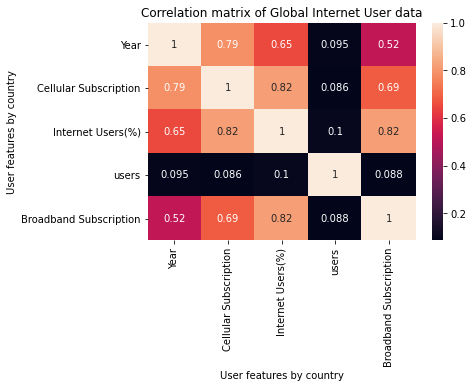

In [234]:
corr_matrix = global_users.corr()

# Use seaborn package. The strength of correlation is given vaguely by the heatmap and more eactly by the numerically. 
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix of Global Internet User data')
plt.xlabel('User features by country')
plt.ylabel('User features by country')
plt.show()

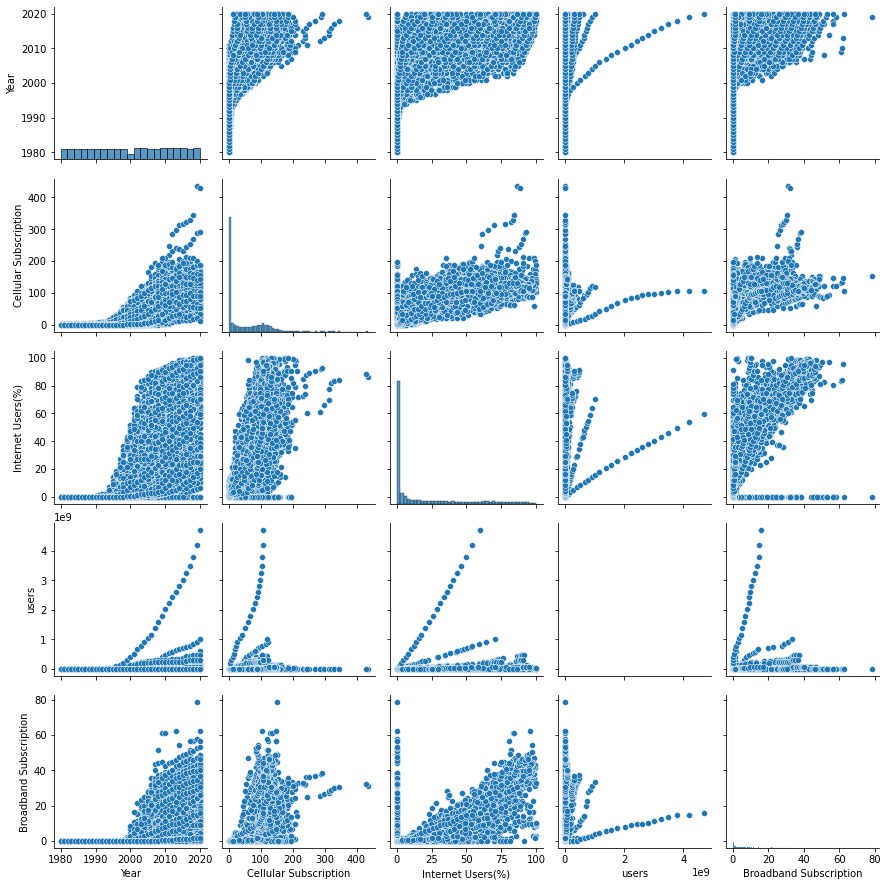

In [238]:
# Pairplot
sns.pairplot(global_users)
plt.show()

In [ ]:
# We're going to do a bee swarm plot by country

# Group the data by 'Country' and sum the users for each country
sum_users = global_users.groupby('Country')['users'].sum()

# Create a new DataFrame with the summed users for each country
new_df = pd.DataFrame({Summed_Users': sum_users})

print(new_df)
new_df.dtypes

In [ ]:
# Bee swarm plot
sns.swarmplot(x='Country', y='users', hue='Year', data=global_users)
plt.show()

In [ ]:
# Create a violin plot of the number of users for each country
sns.violinplot(x='Country', y='Users', data=df)

*****************Comments on correlation matrix, pairplot and any scatter plots???????****************